Program the maximum subarry problem in python

In [1]:
def findMaxCrossSubArray(A, low, mid, high):
    left_sum = float('-inf')
    sum = 0
    for i in reversed(range(low, mid+1)):
        sum = sum + A[i]
        if(sum > left_sum):
            left_sum = sum
            max_left = i

    right_sum = float('-inf')
    sum = 0
    for j in range(mid+1, high+1):
        sum = sum + A[j]
        if(sum > right_sum):
            right_sum = sum
            max_right = j
    bigest_sum = left_sum + right_sum 
    return max_left, max_right, bigest_sum

In [2]:
def findMaxSubArray(A, low, high):
    if(high == low):
        return low, high, A[low];
    else:
        mid = (low + high)//2
        left_low, left_high, left_sum = findMaxSubArray(A, low, mid)
        right_low, right_high, right_sum = findMaxSubArray(A, mid + 1, high)
        cross_low, cross_high, cross_sum = findMaxCrossSubArray(A, low, mid, high)
        if((left_sum >= right_sum) & (left_sum  >= cross_sum)):
            return left_low, left_high, left_sum
        elif((right_sum >= left_sum) & (right_sum >= cross_sum)):
            return right_low, right_high, right_sum
        else: return cross_low, cross_high, cross_sum     



In [3]:

a, b, c = findMaxSubArray([2, -1, 4, -5, 4, 3], 0, 5 )
print(f"start index: {a}")
print(f"end index: {b}")
print(f"maximum sum: {c}")

start index: 4
end index: 5
maximum sum: 7


Plot actual time spent and compare it with the theoretical complexity.

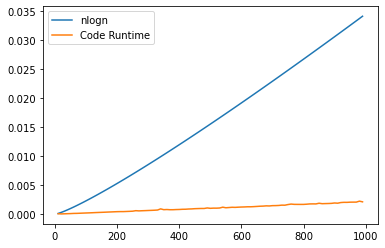

In [51]:
from random import sample
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np


# The range of n will be between 10 and 1000 with a growth rate of 10 per iteration
num_samples = range(10, 1000, 10)

n = 8

# The constant value c shows somewhat of a match between nlogn and the algorithm when c = 1/200000
# This is probably true for my PC due to hardware and might be a different value for a different one
c = 1/200000

timevals = []
y_nlogn = []
for n in num_samples:
    my_list = sample(range(n), n)
    y_nlogn.append(c * n * np.log(n))
    time = timeit('findMaxSubArray(my_list, 0, len(my_list) - 1)', number=1, globals=globals())
    timevals.append(time)
plt.plot(num_samples, y_nlogn, label='nlogn')
plt.plot(num_samples, timevals, label="Code Runtime")
plt.legend()
plt.show()